# <div align="center"><b> LANGGRAPH PLAN AND EXECUTE EXAMPLE </b></div>

<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomendado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al siguiente enlace para ver este notebook en dicha página: <a href="https://nbviewer.org/github/brunomaso1/uba-mia/blob/mia-nlp2/mia-nlp2/Ejemplos/langgraph-plan-and-execute.ipynb">Deepseek local example</a></font></small></em> </div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

<!-- Colab -->
<!-- <div align="center"><img src="https://drive.google.com/uc?export=view&id=1QSNrTsz1hQbmZwpgwx0qpfpNtLW19Orm" width="600" alt="Figura 1: A data scientist is working on word generation using the Lord of the Rings lore. The image is dark and moody, with a focus on the scientist's computer screen. The screen displays a visualization the one ring, with a map of Middle Earth in the background. - Generada con DALL-E3"></div> -->

<div align="center"><img src="../resources/img1.jpeg" width="600" alt="Figura 1: A data scientist is sitting in front of a computer screen, intently focused on the task at hand. The room is dimly lit, with the only light coming from the computer screen. The neural network is displayed on the screen, with the data scientist working to. The nerual network is deepseek R1. - Generada con Microsoft Image Creator"></div>

<div align="center"><small><em>Figura 1: A data scientist is sitting in front of a computer screen, intently focused on the task at hand. The room is dimly lit, with the only light coming from the computer screen. The neural network is displayed on the screen, with the data scientist working to. The nerual network is deepseek R1. - Generada con Microsoft Image Creator</em></small></div>

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Langgraph + Agents + Plan-and-execute                                                                                                  |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Ejemplo de creación de una soución con agentes que planean una solución y la ejecutan                                                  |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com)                                                                                                  |

</div>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻

Asegurate de tener instalado poetry y estar en la carpeta donde se encuentra el archivo `pyproject.toml` para instalar las dependencias del proyecto.
Luego, instala las dependencias del proyecto ejecutando el siguiente comando en la terminal:

- bash:
```bash
poetry install
eval $(poetry env activate)
```

- powershell:
```powershell
poetry install
Invoke-Expression (poetry env activate)
```

✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [ ]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool
from typing import Annotated
import math
from langgraph.prebuilt import ToolNode, create_react_agent
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langchain_core.prompts import SystemMessagePromptTemplate
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [ ]:
DOT_ENV_PATH = "../.env"
load_dotenv(DOT_ENV_PATH)

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
# GROQ_MODEL = "llama-3.3-70b-versatile"
GROQ_MODEL = "gemma2-9b-it"

## Consinga

El objetivo de este ejercicio es implementar un sistema que utilice un modelo de lenguaje grande (LLM) para responder preguntas complejas. El sistema debe ser capaz de dividir la pregunta en partes más pequeñas y resolver cada una de ellas utilizando diferentes agentes. Luego, las respuestas parciales se combinan para ofrecer una solución completa.

## Resolución

Ejemplos de tutoriales: https://github.com/langchain-ai/langgraph/tree/main/docs/docs/tutorials

Se pretende seguir el siguiente tutorial para implementar el sistema: https://github.com/langchain-ai/langgraph/blob/9637f3b1bea30f93ccdb86978e0eb2be67e6a5ce/docs/docs/tutorials/plan-and-execute/plan-and-execute.ipynb

### Cuando utilizar esta solución

- Cuando se necesita resolver una pregunta compleja que requiere múltiples pasos.
- Cuando se necesita dividir una tarea en subtareas más pequeñas y manejables.
- Cuando se necesita realizar un plan de acción antes de ejecutar una tarea.
- Cuando se necesita utilizar diferentes agentes para resolver diferentes partes de una tarea.
- Cuando se necesita la habilidad de utilizar LLMs pequeños para resolver tareas específicas y LLMs grandes para tareas más complejas.

### Instanciamos el LLM

In [90]:
llm = ChatGroq(groq_api_key=GROQ_API_KEY, model_name=GROQ_MODEL)

### Definimos las herramientas
<small><em>[https://python.langchain.com/docs/integrations/tools/](https://python.langchain.com/docs/integrations/tools/)</em></small>

- Herramienta 1: `Tavily` - Herramienta de búsqueda de información en la web.
- Herramienta 2: `calculo_area` - Herramienta de cálculo.

In [ ]:
@tool
def calculate_cylinder_area(
    radius: Annotated[float, "Radio del cilindro en metros"],
    height: Annotated[float, "Altura del cilindro en metros"],
) -> Annotated[float, "Área del cilindro en metros cuadrados"]:
    """Calcula el área total de un cilindro basado en el radio y la altura en metros.

    Args:
        radius (float): El radio del cilindro en metros.
        height (float): La altura del cilindro en metros.

    Returns:
        float: El área del cilindro en metros cuadrados.
    """
    return (2 * math.pi * radius * height) + (2 * math.pi * pow(radius, 2))


@tool
def calculate_cylinder_amount_of_paint(
    area: Annotated[float, "Area del cilindro a pintar en metros cuadrados"],
) -> Annotated[float, "Cantidad de pintura en litros"]:
    """Calcula la cantidad de pintura necesaria para pintar un cilindro basada en el área en metros cuadrados.

    Args:
       area (float): El área a pintar en metros cuadrados.

    Returns:
       float: La cantidad de pintura necesaria en litros.
    """
    return area / 10

In [ ]:
tools = [calculate_cylinder_area, calculate_cylinder_amount_of_paint]
tool_node = ToolNode(tools)

### Definimos el agente

In [ ]:


prompt = "Eres un útil asistente."
agent_executor = create_react_agent(llm, tools=tool_node)

### Probamos el agente

In [ ]:
from langchain_core.messages import HumanMessage

agent_executor.invoke(
    {
        "messages": [
            ("user", "Cual es el area de un cilindro con radio 5 m y altura 10 m?")
        ]
    }
)

' agent_executor.invoke(\n    {\n        "messages": [\n            ("user", "Cual es el area de un cilindro con radio 5 m y altura 10 m?")\n        ]\n    }\n) '

In [ ]:
agent_executor.invoke(
    {
        "messages": [
            (
                "user",
                "Cual es la cantidad de pintura que se necesita para pintar un área de 471 m²?",
            )
        ]
    }
)

' agent_executor.invoke(\n    {\n        "messages": [\n            (\n                "user",\n                "Cual es la cantidad de pintura que se necesita para pintar un área de 471 m²?",\n            )\n        ]\n    }\n) '

### Definimos el estado

In [97]:
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages


class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

### Definimos los planes

In [98]:
from pydantic import BaseModel, Field


class Plan(BaseModel):
    """Planificación de pasos para resolver un problema."""

    steps: List[str] = Field(
        description="Pasos a seguir para resolver el problema. Debería estar ordenado en forma descendente.",
    )

### Probamos la definición de los planes

In [ ]:
planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
                Eres un planificador que construye un plan paso a paso.
                Usa exactamente este formato para invocar herramientas:

                Llamar a <nombre_herramienta> con <JSON-de-argumentos>.

                Herramientas disponibles:
                1. calculate_cylinder_area   — calcula área total de un cilindro.
                    JSON schema: {{"radius": float, "height": float}}
                2. calculate_cylinder_amount_of_paint — calcula litros de pintura.
                    JSON schema: {{"area": float}}

                No agregues explicaciones extra, solo el plan.

                Ejemplo:
                Input: "¿Cuál es el área de un cilindro con radio 2 m y altura 4 m?"
                Plan:
                1. Llamar a calculate_cylinder_area con {{"radius": 2, "height": 4}}
                2. Responder con el resultado.
            """,
        ),
        ("placeholder", "{messages}"),
    ]
)
planner = planner_prompt | llm.with_structured_output(Plan)

In [100]:
planner.invoke(
    {
        "messages": [
            (
                "user",
                "Cuanta pintura se necesita para pintar un cilindro con radio 5 m y altura 10 m?",
            )
        ]
    }
)

Plan(steps=['Llamar a calculate_cylinder_area con {"radius": 5, "height": 10}', 'Llamar a calculate_cylinder_amount_of_paint con {"area": "resultado del paso anterior"}'])

### Re-plan

In [101]:
from typing import Union


class Response(BaseModel):
    """Respuesta al usuario."""

    response: str


class Act(BaseModel):
    """Acción a realizar."""

    action: Union[Response, Plan] = Field(
        description="Acción a realizar. Si quieres responder al usuario, usa Response. Si necesitas usar herramientas para obtener la respuesta, usa Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """Para el objetivo dado, elabora un plan simple paso a paso. Este plan debe involucrar tareas individuales, que si se ejecutan correctamente darán la respuesta correcta. No agregues pasos superfluos. El resultado del paso final debe ser la respuesta final. Asegúrate de que cada paso tenga toda la información necesaria. No omitas pasos y debes utilizar las herramientas disponibles para resolver el problema.

    Tu objetivo era este:
    {input}

    Tu plan original era este:
    {plan}

    Hasta ahora has realizado los siguientes pasos:
    {past_steps}

    Actualiza tu plan en consecuencia. Si no se necesitan más pasos y puedes volver al usuario, entonces responde con eso. De lo contrario, completa el plan. Solo agrega pasos al plan que aún NECESITAN hacerse. No devuelvas pasos ya realizados como parte del plan.
"""
)

replanner = replanner_prompt | llm.with_structured_output(Act)

### Creamos el grafo

In [ ]:
from typing import Literal
from langgraph.graph import END


def plan_step(state: PlanExecute):
    print("-" * 20 + "DEBUGING (plan_step)" + "-" * 20)
    print(f"State: {state}")
    plan = planner.invoke({"messages": [("user", state["input"])]})
    print(f"Plan: {plan}")
    print("-" * 20 + "END DEBUGING" + "-" * 20)
    return {"plan": plan.steps}


def execute_step(state: PlanExecute):
    print("-" * 20 + "DEBUGING (execute_step)" + "-" * 20)
    print(f"State: {state}")

    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""Para el siguiente plan:
        {plan_str}

        Se te pide que ejecutes el paso {1}: {task}.
        """
    agent_response = agent_executor.invoke({"messages": ["user", task_formatted]})
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }


def replan_step(state: PlanExecute):
    output = replanner.invoke(state)
    if isinstance(output.action, Response):
        return {"response": output.action.response}
    else:
        return {"plan": output.action.steps}


def should_end(state: PlanExecute):
    if "response" in state and state["response"]:
        return END
    else:
        return "agent"

In [103]:
from langgraph.graph import StateGraph, START

workflow = StateGraph(PlanExecute)

workflow.add_node("planner", plan_step)
workflow.add_node("agent", execute_step)
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner")
workflow.add_edge("planner", "agent")
workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    should_end,
    ["agent", END],
)

graph = workflow.compile()

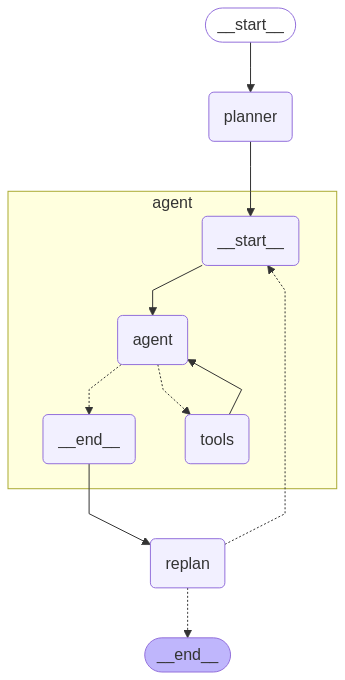

In [104]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [106]:
config = {"recursion_limit": 50}
inputs = {
    "input": "¿Cuánta pintura necesito para pintar un cilindro de radio 5 m y altura 10 m?"
}
for event in graph.stream(inputs, config=config):
    for k, v in event.items():
        if k != "__end__":
            print(v)

--------------------DEBUGING (plan_step)--------------------
State: {'input': '¿Cuánta pintura necesito para pintar un cilindro de radio 5 m y altura 10 m?', 'past_steps': []}
Plan: steps=['Calcular el área total del cilindro', 'Calcular la cantidad de pintura necesaria']
--------------------END DEBUGING--------------------
{'plan': ['Calcular el área total del cilindro', 'Calcular la cantidad de pintura necesaria']}
--------------------DEBUGING (execute_step)--------------------
State: {'input': '¿Cuánta pintura necesito para pintar un cilindro de radio 5 m y altura 10 m?', 'plan': ['Calcular el área total del cilindro', 'Calcular la cantidad de pintura necesaria'], 'past_steps': []}
Plan: 1. Calcular el área total del cilindro
2. Calcular la cantidad de pintura necesaria
Task: Calcular el área total del cilindro
Task formatted: Para el siguiente plan:
        1. Calcular el área total del cilindro
2. Calcular la cantidad de pintura necesaria

        Se te pide que ejecutes el paso 1

## Recursos

Tutoriales:
- [https://langchain-ai.github.io/langgraph/tutorials/introduction/#setup](https://langchain-ai.github.io/langgraph/tutorials/introduction/#setup) (basico)
- https://github.com/langchain-ai/langgraph/tree/main/docs/docs/tutorials

Conceptos:
- [https://python.langchain.com/docs/concepts/](https://python.langchain.com/docs/concepts/) (langchain)
- [https://langchain-ai.github.io/langgraph/concepts/#langgraph](https://langchain-ai.github.io/langgraph/concepts/) (langgraph)
- [https://langchain-ai.github.io/langgraph/concepts/low_level/](https://langchain-ai.github.io/langgraph/concepts/low_level)

Modelos:
- [https://python.langchain.com/docs/integrations/chat/](https://python.langchain.com/docs/integrations/chat/)